In [59]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


In [76]:
df = pd.read_csv("canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


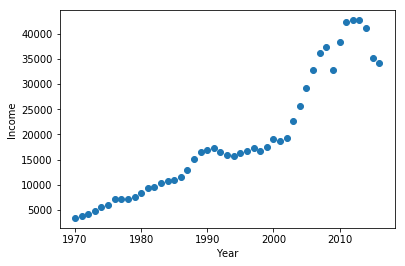

In [65]:
df = df.rename(columns={'per capita income (US$)':'income'})
df
plt.xlabel("Year")
plt.ylabel("Income")
plt.scatter(df.year, df.income)

In [66]:
new_df = df.drop('income', axis = 'columns')
new_df.head(5)

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [67]:
model = LinearRegression()
model.fit(new_df, df.income)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print (model.coef_)
print (model.intercept_)
model.predict([[2020]])

[828.46507522]
-1632210.7578554575


array([41288.69409442])

In [20]:
y = model.intercept_ + model.coef_*2020
y

array([41288.69409442])

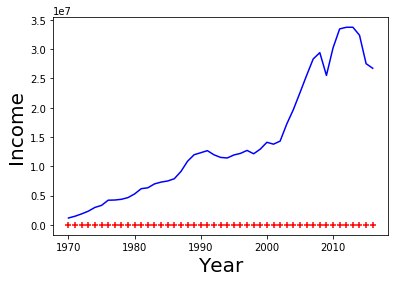

In [74]:
%matplotlib inline
plt.xlabel ("Year", fontsize=20)
plt.ylabel("Income", fontsize = 20)
plt.scatter (df.year, df.income, color = 'red', marker="+")
plt.plot(df.year, model.predict(df[['income']]), color= 'blue')

In [69]:
d = pd.read_csv("predictions.csv")
d.head()
p = model.predict(d)
d['income'] = p
d

,year,income
0,2011,33832.508417
1,2015,37146.368718
2,2020,41288.694094
3,2078,89339.668457
4,2034,52887.205148
5,2013,35489.438568
6,2011,33832.508417
7,2035,53715.670223
8,2025,45431.019471


In [71]:
d.to_csv("yearpred.csv", index=False)

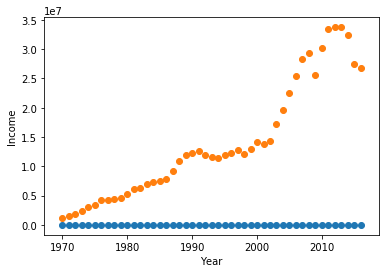

In [50]:
plt.xlabel("Year")
plt.ylabel("Income")
plt.scatter(df.year, df['per capita income (US$)'])
plt.scatter(df.year, model.predict(df[['per capita income (US$)']]))
